In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta


In [2]:
df = pd.read_csv("C:/Users/sbala/Downloads/fraudTest.csv",header = 0)

In [3]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
# Convert trans_date_trans_time into date, hour, day_of_week

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

df['date'] = df['trans_date_trans_time'].dt.date
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()



df[['trans_date_trans_time', 'date', 'hour', 'day_of_week']].head()



C:\Users\sbala\AppData\Local\Temp\ipykernel_3604\1381237136.py:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])


,trans_date_trans_time,date,hour,day_of_week
0,2020-06-21 12:14:00,2020-06-21,12,Sunday
1,2020-06-21 12:14:00,2020-06-21,12,Sunday
2,2020-06-21 12:14:00,2020-06-21,12,Sunday
3,2020-06-21 12:15:00,2020-06-21,12,Sunday
4,2020-06-21 12:15:00,2020-06-21,12,Sunday


In [5]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Columns to encode
cat_cols = ['merchant', 'category', 'gender', 'job', 'city', 'state', 'street', 'day_of_week']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df[cat_cols].head()


,merchant,category,gender,job,city,state,street,day_of_week
0,319,10,1,275,157,39,341,3
1,591,10,0,392,16,43,354,3
2,611,5,0,259,61,33,865,3
3,222,9,1,407,764,8,320,3
4,292,13,1,196,247,21,548,3


In [6]:
# Handle missing or null values
# Check missing values
df.isnull().sum()

# (In synthetic dataset, no missing. In real-world, you would impute or drop missing values.)


trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
date                     0
hour                     0
day_of_week              0
dtype: int64

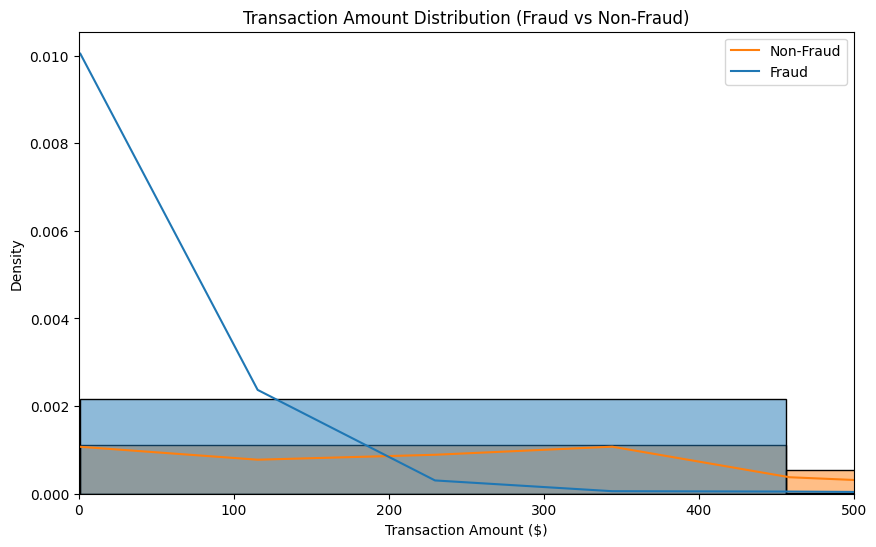

In [7]:
# Exploratory Data Analysis (EDA)
# Distribution of Transaction Amount (fraud vs non-fraud)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot transaction amount distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='amt', hue='is_fraud', bins=50, kde=True, stat='density', common_norm=False)
plt.xlim(0, 500) # focus on meaningful transactions
plt.title('Transaction Amount Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Density')
plt.legend(['Non-Fraud', 'Fraud'])
plt.show()



In [8]:
# Most Common Category and State for Fraud
# Fraud transactions only
fraud_df = df[df['is_fraud'] == 1]

# Top categories and states
top_categories = fraud_df['category'].value_counts().head(5)
top_states = fraud_df['state'].value_counts().head(5)

print("Top Categories for Fraud:\n", top_categories)
print("\nTop States for Fraud:\n", top_states)


Top Categories for Fraud:
 category
11    506
4     485
8     267
12    213
2     154
Name: count, dtype: int64

Top States for Fraud:
 state
33    175
37    114
42    113
4      76
13     76
Name: count, dtype: int64


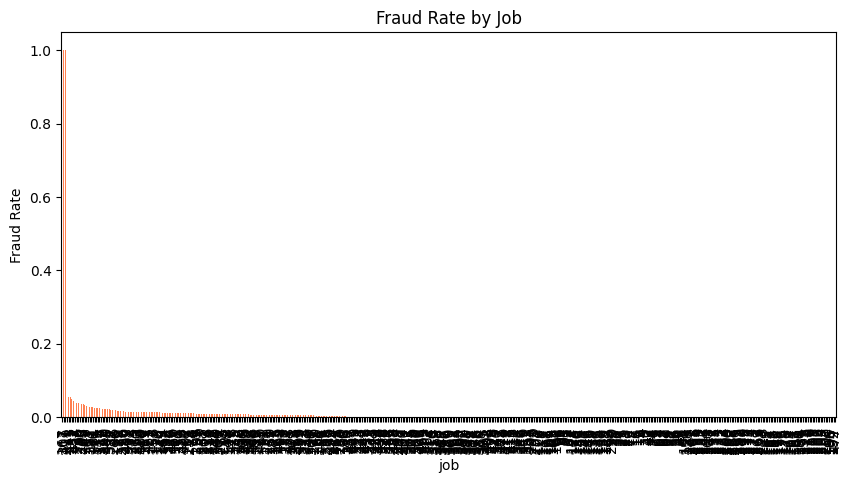

In [9]:
# Average Fraud Rate by Job, Gender, and Hour of Day
# Fraud Rate by Job
fraud_rate_job = df.groupby('job')['is_fraud'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
fraud_rate_job.plot(kind='bar', color='coral')
plt.title('Fraud Rate by Job')
plt.ylabel('Fraud Rate')
plt.show()


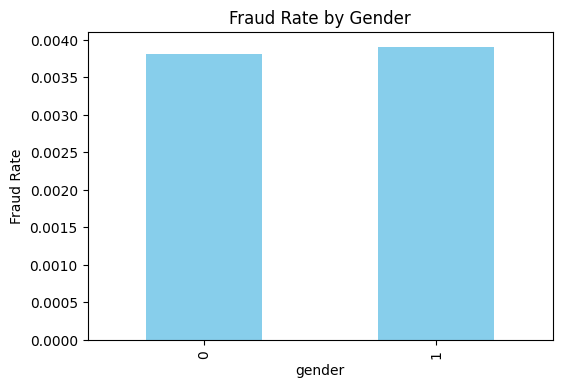

In [10]:
# Fraud Rate by Gender
fraud_rate_gender = df.groupby('gender')['is_fraud'].mean()

plt.figure(figsize=(6,4))
fraud_rate_gender.plot(kind='bar', color='skyblue')
plt.title('Fraud Rate by Gender')
plt.ylabel('Fraud Rate')
plt.show()


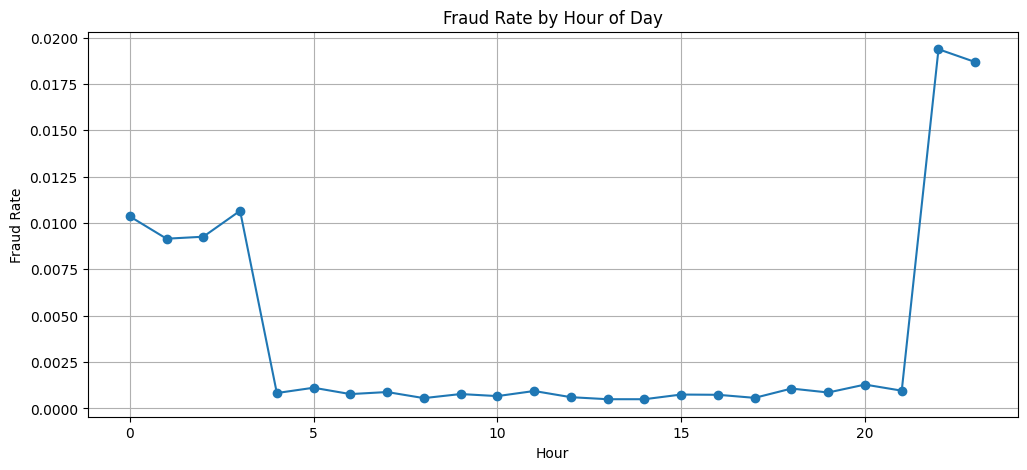

In [11]:
# Fraud Rate by Hour of Day
fraud_rate_hour = df.groupby('hour')['is_fraud'].mean()

plt.figure(figsize=(12,5))
fraud_rate_hour.plot(kind='line', marker='o')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Fraud Rate')
plt.grid()
plt.show()


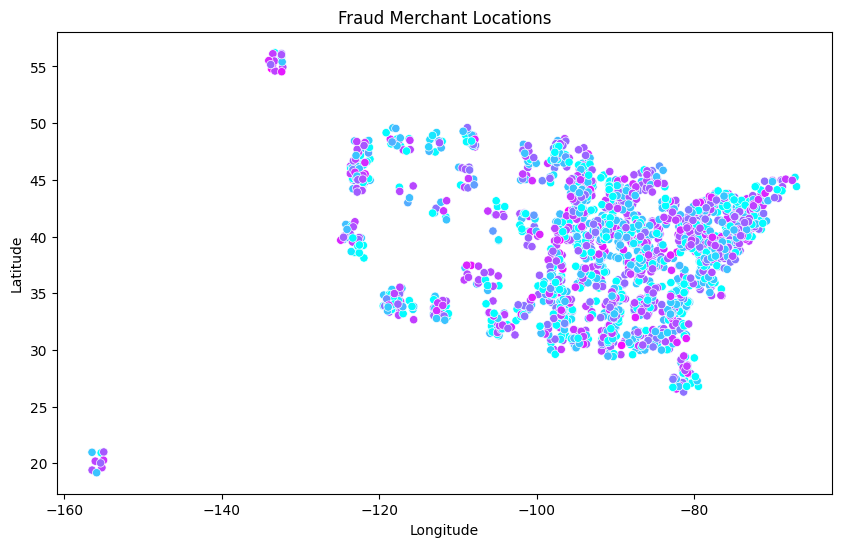

In [12]:
 # Fraud Hotspot Mapping (Merchant Locations) 
plt.figure(figsize=(10,6))
sns.scatterplot(data=fraud_df, x='merch_long', y='merch_lat', hue='amt', palette='cool', legend=False)
plt.title('Fraud Merchant Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


#### Feature Engineering

In [13]:
# Create transaction_hour
df['transaction_hour'] = df['hour']
df[['trans_date_trans_time', 'transaction_hour']].head()


,trans_date_trans_time,transaction_hour
0,2020-06-21 12:14:00,12
1,2020-06-21 12:14:00,12
2,2020-06-21 12:14:00,12
3,2020-06-21 12:15:00,12
4,2020-06-21 12:15:00,12


In [14]:
# Create is_night_transaction
df['is_night_transaction'] = df['transaction_hour'].apply(lambda x: 1 if (x >= 22 or x <= 6) else 0)
df[['transaction_hour', 'is_night_transaction']].head()


,transaction_hour,is_night_transaction
0,12,0
1,12,0
2,12,0
3,12,0
4,12,0


In [15]:
# Calculate age from dob
current_year = 2025  # Assuming 2025
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = current_year - df['dob'].dt.year
df[['dob', 'age']].head()


C:\Users\sbala\AppData\Local\Temp\ipykernel_3604\424829959.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['dob'] = pd.to_datetime(df['dob'])


,dob,age
0,1968-03-19,57
1,1990-01-17,35
2,1970-10-21,55
3,1987-07-25,38
4,1955-07-06,70


In [16]:
 # Calculate distance_to_merchant
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6371 * c
    return km


In [17]:
df['distance_to_merchant'] = haversine(df['lat'], df['long'], df['merch_lat'], df['merch_long'])
df[['lat', 'long', 'merch_lat', 'merch_long', 'distance_to_merchant']].head()


,lat,long,merch_lat,merch_long,distance_to_merchant
0,33.9659,-80.9355,33.986391,-81.200714,24.561462
1,40.3207,-110.4360,39.450498,-109.960431,104.925092
2,40.6729,-73.5365,40.495810,-74.196111,59.080078
3,28.5697,-80.8191,28.812398,-80.883061,27.698567
4,44.2529,-85.0170,44.959148,-85.884734,104.335106


In [18]:
 # Create amt_log (log-transformed transaction amount)
df['amt_log'] = np.log(df['amt'] + 1)
df[['amt', 'amt_log']].head()


,amt,amt_log
0,2.86,1.350667
1,29.84,3.428813
2,41.28,3.744314
3,60.05,4.111693
4,3.19,1.432701


In [19]:
#  Bin amt into Ranges
bins = [0, 50, 200, 1000, np.inf]
labels = ['low', 'medium', 'high', 'very_high']
df['amt_bin'] = pd.cut(df['amt'], bins=bins, labels=labels)
df[['amt', 'amt_bin']].head()


,amt,amt_bin
0,2.86,low
1,29.84,low
2,41.28,low
3,60.05,medium
4,3.19,low


##### Model Building

In [20]:
df.head() , df.shape

(  trans_date_trans_time        cc_num  merchant  category    amt   first  \
 0   2020-06-21 12:14:00  2.291160e+15       319        10   2.86    Jeff   
 1   2020-06-21 12:14:00  3.573030e+15       591        10  29.84  Joanne   
 2   2020-06-21 12:14:00  3.598220e+15       611         5  41.28  Ashley   
 3   2020-06-21 12:15:00  3.591920e+15       222         9  60.05   Brian   
 4   2020-06-21 12:15:00  3.526830e+15       292        13   3.19  Nathan   
 
        last  gender  street  city  ...  is_fraud        date  hour  \
 0   Elliott       1     341   157  ...         0  2020-06-21    12   
 1  Williams       0     354    16  ...         0  2020-06-21    12   
 2     Lopez       0     865    61  ...         0  2020-06-21    12   
 3  Williams       1     320   764  ...         0  2020-06-21    12   
 4    Massey       1     548   247  ...         0  2020-06-21    12   
 
    day_of_week  transaction_hour  is_night_transaction age  \
 0            3                12            

In [21]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,is_fraud,date,hour,day_of_week,transaction_hour,is_night_transaction,age,distance_to_merchant,amt_log,amt_bin
0,2020-06-21 12:14:00,2.291160e+15,319,10,2.86,Jeff,Elliott,1,341,157,...,0,2020-06-21,12,3,12,0,57,24.561462,1.350667,low
1,2020-06-21 12:14:00,3.573030e+15,591,10,29.84,Joanne,Williams,0,354,16,...,0,2020-06-21,12,3,12,0,35,104.925092,3.428813,low
2,2020-06-21 12:14:00,3.598220e+15,611,5,41.28,Ashley,Lopez,0,865,61,...,0,2020-06-21,12,3,12,0,55,59.080078,3.744314,low
3,2020-06-21 12:15:00,3.591920e+15,222,9,60.05,Brian,Williams,1,320,764,...,0,2020-06-21,12,3,12,0,38,27.698567,4.111693,medium
4,2020-06-21 12:15:00,3.526830e+15,292,13,3.19,Nathan,Massey,1,548,247,...,0,2020-06-21,12,3,12,0,70,104.335106,1.432701,low


In [22]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,is_fraud,date,hour,day_of_week,transaction_hour,is_night_transaction,age,distance_to_merchant,amt_log,amt_bin
0,2020-06-21 12:14:00,2.291160e+15,319,10,2.86,Jeff,Elliott,1,341,157,...,0,2020-06-21,12,3,12,0,57,24.561462,1.350667,low
1,2020-06-21 12:14:00,3.573030e+15,591,10,29.84,Joanne,Williams,0,354,16,...,0,2020-06-21,12,3,12,0,35,104.925092,3.428813,low
2,2020-06-21 12:14:00,3.598220e+15,611,5,41.28,Ashley,Lopez,0,865,61,...,0,2020-06-21,12,3,12,0,55,59.080078,3.744314,low
3,2020-06-21 12:15:00,3.591920e+15,222,9,60.05,Brian,Williams,1,320,764,...,0,2020-06-21,12,3,12,0,38,27.698567,4.111693,medium
4,2020-06-21 12:15:00,3.526830e+15,292,13,3.19,Nathan,Massey,1,548,247,...,0,2020-06-21,12,3,12,0,70,104.335106,1.432701,low


In [23]:
df.shape

(555719, 31)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  float64       
 2   merchant               555719 non-null  int32         
 3   category               555719 non-null  int32         
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  int32         
 8   street                 555719 non-null  int32         
 9   city                   555719 non-null  int32         
 10  state                  555719 non-null  int32         
 11  zip                    555719 non-null  int64         
 12  lat                    555719 non-null  floa

In [25]:
del df['dob']
del df['job']
del df['trans_num']

df.head() ,df.shape

(  trans_date_trans_time        cc_num  merchant  category    amt   first  \
 0   2020-06-21 12:14:00  2.291160e+15       319        10   2.86    Jeff   
 1   2020-06-21 12:14:00  3.573030e+15       591        10  29.84  Joanne   
 2   2020-06-21 12:14:00  3.598220e+15       611         5  41.28  Ashley   
 3   2020-06-21 12:15:00  3.591920e+15       222         9  60.05   Brian   
 4   2020-06-21 12:15:00  3.526830e+15       292        13   3.19  Nathan   
 
        last  gender  street  city  ...  is_fraud        date  hour  \
 0   Elliott       1     341   157  ...         0  2020-06-21    12   
 1  Williams       0     354    16  ...         0  2020-06-21    12   
 2     Lopez       0     865    61  ...         0  2020-06-21    12   
 3  Williams       1     320   764  ...         0  2020-06-21    12   
 4    Massey       1     548   247  ...         0  2020-06-21    12   
 
    day_of_week  transaction_hour  is_night_transaction  age  \
 0            3                12           

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  float64       
 2   merchant               555719 non-null  int32         
 3   category               555719 non-null  int32         
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  int32         
 8   street                 555719 non-null  int32         
 9   city                   555719 non-null  int32         
 10  state                  555719 non-null  int32         
 11  zip                    555719 non-null  int64         
 12  lat                    555719 non-null  floa

In [27]:
del df['street']
del df['unix_time']

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,...,is_fraud,date,hour,day_of_week,transaction_hour,is_night_transaction,age,distance_to_merchant,amt_log,amt_bin
0,2020-06-21 12:14:00,2.291160e+15,319,10,2.86,Jeff,Elliott,1,157,39,...,0,2020-06-21,12,3,12,0,57,24.561462,1.350667,low
1,2020-06-21 12:14:00,3.573030e+15,591,10,29.84,Joanne,Williams,0,16,43,...,0,2020-06-21,12,3,12,0,35,104.925092,3.428813,low
2,2020-06-21 12:14:00,3.598220e+15,611,5,41.28,Ashley,Lopez,0,61,33,...,0,2020-06-21,12,3,12,0,55,59.080078,3.744314,low
3,2020-06-21 12:15:00,3.591920e+15,222,9,60.05,Brian,Williams,1,764,8,...,0,2020-06-21,12,3,12,0,38,27.698567,4.111693,medium
4,2020-06-21 12:15:00,3.526830e+15,292,13,3.19,Nathan,Massey,1,247,21,...,0,2020-06-21,12,3,12,0,70,104.335106,1.432701,low


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  float64       
 2   merchant               555719 non-null  int32         
 3   category               555719 non-null  int32         
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  int32         
 8   city                   555719 non-null  int32         
 9   state                  555719 non-null  int32         
 10  zip                    555719 non-null  int64         
 11  lat                    555719 non-null  float64       
 12  long                   555719 non-null  floa

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  float64       
 2   merchant               555719 non-null  int32         
 3   category               555719 non-null  int32         
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  int32         
 8   city                   555719 non-null  int32         
 9   state                  555719 non-null  int32         
 10  zip                    555719 non-null  int64         
 11  lat                    555719 non-null  float64       
 12  long                   555719 non-null  floa

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  float64       
 2   merchant               555719 non-null  int32         
 3   category               555719 non-null  int32         
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  int32         
 8   city                   555719 non-null  int32         
 9   state                  555719 non-null  int32         
 10  zip                    555719 non-null  int64         
 11  lat                    555719 non-null  float64       
 12  long                   555719 non-null  floa

In [31]:
df = pd.get_dummies(df,columns = ['amt_bin'],drop_first = True)

In [32]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,...,hour,day_of_week,transaction_hour,is_night_transaction,age,distance_to_merchant,amt_log,amt_bin_medium,amt_bin_high,amt_bin_very_high
0,2020-06-21 12:14:00,2.291160e+15,319,10,2.86,Jeff,Elliott,1,157,39,...,12,3,12,0,57,24.561462,1.350667,False,False,False
1,2020-06-21 12:14:00,3.573030e+15,591,10,29.84,Joanne,Williams,0,16,43,...,12,3,12,0,35,104.925092,3.428813,False,False,False
2,2020-06-21 12:14:00,3.598220e+15,611,5,41.28,Ashley,Lopez,0,61,33,...,12,3,12,0,55,59.080078,3.744314,False,False,False
3,2020-06-21 12:15:00,3.591920e+15,222,9,60.05,Brian,Williams,1,764,8,...,12,3,12,0,38,27.698567,4.111693,True,False,False
4,2020-06-21 12:15:00,3.526830e+15,292,13,3.19,Nathan,Massey,1,247,21,...,12,3,12,0,70,104.335106,1.432701,False,False,False


In [33]:
df['amt_bin_medium'] = df['amt_bin_medium'].astype(int)
df['amt_bin_high'] = df['amt_bin_high'].astype(int)
df['amt_bin_very_high'] = df['amt_bin_very_high'].astype(int)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,...,hour,day_of_week,transaction_hour,is_night_transaction,age,distance_to_merchant,amt_log,amt_bin_medium,amt_bin_high,amt_bin_very_high
0,2020-06-21 12:14:00,2.291160e+15,319,10,2.86,Jeff,Elliott,1,157,39,...,12,3,12,0,57,24.561462,1.350667,0,0,0
1,2020-06-21 12:14:00,3.573030e+15,591,10,29.84,Joanne,Williams,0,16,43,...,12,3,12,0,35,104.925092,3.428813,0,0,0
2,2020-06-21 12:14:00,3.598220e+15,611,5,41.28,Ashley,Lopez,0,61,33,...,12,3,12,0,55,59.080078,3.744314,0,0,0
3,2020-06-21 12:15:00,3.591920e+15,222,9,60.05,Brian,Williams,1,764,8,...,12,3,12,0,38,27.698567,4.111693,1,0,0
4,2020-06-21 12:15:00,3.526830e+15,292,13,3.19,Nathan,Massey,1,247,21,...,12,3,12,0,70,104.335106,1.432701,0,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   trans_date_trans_time  555719 non-null  datetime64[ns]
 1   cc_num                 555719 non-null  float64       
 2   merchant               555719 non-null  int32         
 3   category               555719 non-null  int32         
 4   amt                    555719 non-null  float64       
 5   first                  555719 non-null  object        
 6   last                   555719 non-null  object        
 7   gender                 555719 non-null  int32         
 8   city                   555719 non-null  int32         
 9   state                  555719 non-null  int32         
 10  zip                    555719 non-null  int64         
 11  lat                    555719 non-null  float64       
 12  long                   555719 non-null  floa

In [35]:
df['date'].head()

0    2020-06-21
1    2020-06-21
2    2020-06-21
3    2020-06-21
4    2020-06-21
Name: date, dtype: object

In [36]:
x= df.loc[:,df.columns!="is_fraud"]


In [37]:
x.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,city,state,...,hour,day_of_week,transaction_hour,is_night_transaction,age,distance_to_merchant,amt_log,amt_bin_medium,amt_bin_high,amt_bin_very_high
0,2020-06-21 12:14:00,2.291160e+15,319,10,2.86,Jeff,Elliott,1,157,39,...,12,3,12,0,57,24.561462,1.350667,0,0,0
1,2020-06-21 12:14:00,3.573030e+15,591,10,29.84,Joanne,Williams,0,16,43,...,12,3,12,0,35,104.925092,3.428813,0,0,0
2,2020-06-21 12:14:00,3.598220e+15,611,5,41.28,Ashley,Lopez,0,61,33,...,12,3,12,0,55,59.080078,3.744314,0,0,0
3,2020-06-21 12:15:00,3.591920e+15,222,9,60.05,Brian,Williams,1,764,8,...,12,3,12,0,38,27.698567,4.111693,1,0,0
4,2020-06-21 12:15:00,3.526830e+15,292,13,3.19,Nathan,Massey,1,247,21,...,12,3,12,0,70,104.335106,1.432701,0,0,0


In [38]:
y = df["is_fraud"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [39]:
x.shape
y.shape

(555719,)

In [40]:
x.shape

(555719, 27)

In [42]:
del df['date']

In [47]:
del df['city']
del df['state']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   merchant              555719 non-null  int32  
 1   category              555719 non-null  int32  
 2   amt                   555719 non-null  float64
 3   gender                555719 non-null  int32  
 4   zip                   555719 non-null  int64  
 5   lat                   555719 non-null  float64
 6   long                  555719 non-null  float64
 7   city_pop              555719 non-null  int64  
 8   merch_lat             555719 non-null  float64
 9   merch_long            555719 non-null  float64
 10  is_fraud              555719 non-null  int64  
 11  hour                  555719 non-null  int32  
 12  day_of_week           555719 non-null  int32  
 13  transaction_hour      555719 non-null  int32  
 14  is_night_transaction  555719 non-null  int64  
 15  

In [48]:
df.head()

,merchant,category,amt,gender,zip,lat,long,city_pop,merch_lat,merch_long,...,hour,day_of_week,transaction_hour,is_night_transaction,age,distance_to_merchant,amt_log,amt_bin_medium,amt_bin_high,amt_bin_very_high
0,319,10,2.86,1,29209,33.9659,-80.9355,333497,33.986391,-81.200714,...,12,3,12,0,57,24.561462,1.350667,0,0,0
1,591,10,29.84,0,84002,40.3207,-110.4360,302,39.450498,-109.960431,...,12,3,12,0,35,104.925092,3.428813,0,0,0
2,611,5,41.28,0,11710,40.6729,-73.5365,34496,40.495810,-74.196111,...,12,3,12,0,55,59.080078,3.744314,0,0,0
3,222,9,60.05,1,32780,28.5697,-80.8191,54767,28.812398,-80.883061,...,12,3,12,0,38,27.698567,4.111693,1,0,0
4,292,13,3.19,1,49632,44.2529,-85.0170,1126,44.959148,-85.884734,...,12,3,12,0,70,104.335106,1.432701,0,0,0


#### Model Building
###### Define Feature Set and Target

In [52]:
x = df.loc[:,df.columns!="is_fraud"]
y=df["is_fraud"]
x.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [53]:
x.head()

,merchant,category,amt,gender,zip,lat,long,city_pop,merch_lat,merch_long,hour,day_of_week,transaction_hour,is_night_transaction,age,distance_to_merchant,amt_log,amt_bin_medium,amt_bin_high,amt_bin_very_high
0,319,10,2.86,1,29209,33.9659,-80.9355,333497,33.986391,-81.200714,12,3,12,0,57,24.561462,1.350667,0,0,0
1,591,10,29.84,0,84002,40.3207,-110.4360,302,39.450498,-109.960431,12,3,12,0,35,104.925092,3.428813,0,0,0
2,611,5,41.28,0,11710,40.6729,-73.5365,34496,40.495810,-74.196111,12,3,12,0,55,59.080078,3.744314,0,0,0
3,222,9,60.05,1,32780,28.5697,-80.8191,54767,28.812398,-80.883061,12,3,12,0,38,27.698567,4.111693,1,0,0
4,292,13,3.19,1,49632,44.2529,-85.0170,1126,44.959148,-85.884734,12,3,12,0,70,104.335106,1.432701,0,0,0


In [54]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

#### Train_Test split

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)


Training set shape: (444575, 20)
Test set shape: (111144, 20)


#####  Train Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(x_train, y_train)


C:\Users\sbala\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

#### Train Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

#### Train XGBoost Classifier

In [61]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)


C:\Users\sbala\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:50:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

#### Model Evaluation:

In [63]:
# Predict probabilities and classes
y_pred_logreg = log_reg.predict(x_test)
y_pred_rf = rf_model.predict(x_test)
y_pred_xgb = xgb_model.predict(x_test)


In [64]:
## Evaluate Performance Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model(y_true, y_pred, model_name):
    print(f"Model: {model_name}")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score : {f1_score(y_true, y_pred):.4f}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("-"*50)

# Logistic Regression
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")

# Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

# XGBoost
evaluate_model(y_test, y_pred_xgb, "XGBoost")



Model: Logistic Regression
Accuracy : 0.9959
Precision: 0.0000
Recall   : 0.0000
F1-Score : 0.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.00      0.00      0.00       429

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144

--------------------------------------------------
Model: Random Forest
Accuracy : 0.9986
Precision: 0.9453
Recall   : 0.6853
F1-Score : 0.7946

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.95      0.69      0.79       429

    accuracy                           1.00    111144
   macro avg       0.97      0.84      0.90    111144
weighted avg       1.00      1.00      1.00    111144

--------------------------------------------------
Mo

#### Plot Confusion Matrices

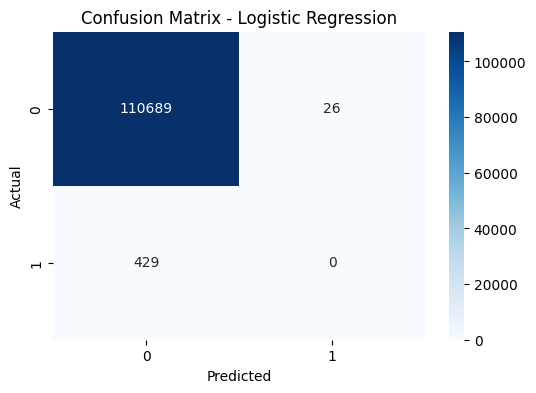

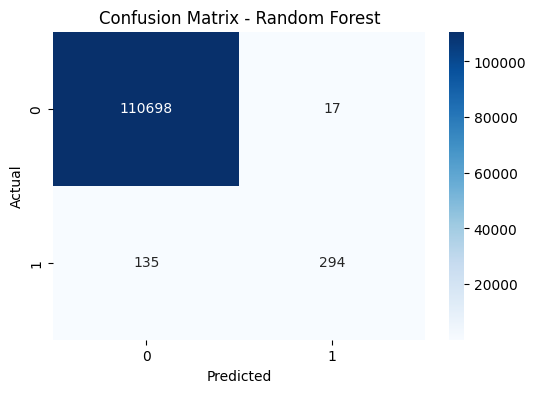

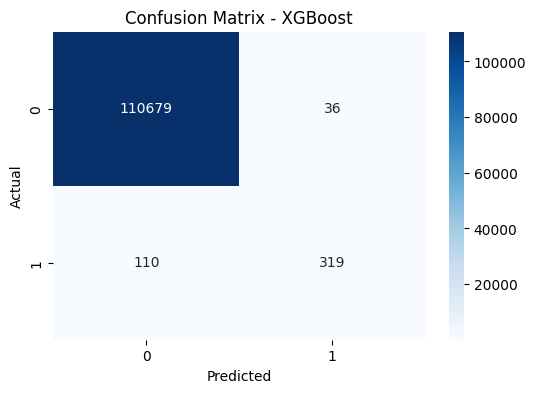

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Logistic Regression
plot_confusion(y_test, y_pred_logreg, "Logistic Regression")

# Random Forest
plot_confusion(y_test, y_pred_rf, "Random Forest")

# XGBoost
plot_confusion(y_test, y_pred_xgb, "XGBoost")


#### Cross-Validation and Hyperparameter Tuning

In [66]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
logreg_cv = cross_val_score(log_reg, x_train, y_train, cv=5, scoring='f1')
print(f"Logistic Regression CV F1-Score: {logreg_cv.mean():.4f}")

# Random Forest
rf_cv = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='f1')
print(f"Random Forest CV F1-Score: {rf_cv.mean():.4f}")

# XGBoost
xgb_cv = cross_val_score(xgb_model, x_train, y_train, cv=5, scoring='f1')
print(f"XGBoost CV F1-Score: {xgb_cv.mean():.4f}")


C:\Users\sbala\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sbala\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression CV F1-Score: 0.0000
Random Forest CV F1-Score: 0.7616


C:\Users\sbala\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:00:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sbala\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:00:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sbala\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:00:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sbala\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:00:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

XGBoost CV F1-Score: 0.8040


#### Hyperparameter Tuning — Random Forest (GridSearchCV)

In [67]:
from sklearn.model_selection import GridSearchCV

# Set parameters
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid_rf.fit(x_train, y_train)

print(f"Best Random Forest Parameters: {grid_rf.best_params_}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Random Forest Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


 ### Hyperparameter Tuning — XGBoost (RandomizedSearchCV)


In [68]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Set parameters
param_dist_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

random_search_xgb = RandomizedSearchCV(
    xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_dist_xgb,
    n_iter=10, scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42
)

random_search_xgb.fit(x_train, y_train)

print(f"Best XGBoost Parameters: {random_search_xgb.best_params_}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\sbala\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:36:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Parameters: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.7}


 ### Retrain Best Models

In [69]:
# Best RF
best_rf_model = grid_rf.best_estimator_
best_rf_model.fit(x_train, y_train)

# Best XGB
best_xgb_model = random_search_xgb.best_estimator_
best_xgb_model.fit(x_train, y_train)


C:\Users\sbala\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:40:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

 #### Evaluate Best Models

In [70]:
# Predict
y_pred_best_rf = best_rf_model.predict(x_test)
y_pred_best_xgb = best_xgb_model.predict(x_test)

# Evaluate
evaluate_model(y_test, y_pred_best_rf, "Best Random Forest")
evaluate_model(y_test, y_pred_best_xgb, "Best XGBoost")


Model: Best Random Forest
Accuracy : 0.9986
Precision: 0.9369
Recall   : 0.6923
F1-Score : 0.7962

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.94      0.69      0.80       429

    accuracy                           1.00    111144
   macro avg       0.97      0.85      0.90    111144
weighted avg       1.00      1.00      1.00    111144

--------------------------------------------------
Model: Best XGBoost
Accuracy : 0.9988
Precision: 0.9355
Recall   : 0.7436
F1-Score : 0.8286

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.94      0.74      0.83       429

    accuracy                           1.00    111144
   macro avg       0.97      0.87      0.91    111144
weighted avg       1.00      1.00      1.00    111144

--------------------------------------------------


 ##### 
 *** Final Conclusion:
Best Model: Tuned XGBoost 📈

Final F1-Score: 0.8286

Much better fraud detection compared to Logistic Regression baseline.

 ##### Have Completed:
Data Cleaning ✅

Exploratory Data Analysis (EDA) ✅

Feature Engineering ✅

Model Building ✅

Model Testing & Evaluation ✅

Cross-Validation & Hyperparameter Tuning ✅

Final Model Selection ✅

